In [2]:
import pandas as pd

In [4]:
seoul = pd.read_csv("../data/Korea/quarantine_seoul - translated.csv")
seoul.drop(columns = "Unnamed: 0", inplace = True)
seoul

Text  \
0     "음압격리병상에서 7일 동안 병상 배정을 기다리는 확진자가 한 명 생기면 열나는 (...   
1     자가격리NO! 베트남 푸꾸옥 빈펄리조트 올인클루시브 999,000원~\nhttps:...   
2     이른바 대장동게이트 협력자들,50억 클럽의 당사자들이 검찰에 소환되 조살 받았는데,...   
3     격리해제 기념으로 주말엔 노꼬메가서\n신나게 놀고왔다. https://t.co/jt...   
4     나리타 공항에 도착해서 그 누구도 감시하지 않고 자유롭게 빠져나갈 수 있는 환경과,...   
...                                                 ...   
2720  미안해 이쯤되면 내 탓 맞는거같다.\n어제 나 병원갔다와서 친구 몇명 만나서 저녁먹...   
2721                                 @Suka_0203 격리수용 ㄷㄷ   
2722  독감확진 남편때문에 아드님 모시고 격리옴 (@ 그랜드하얏트서울 in Yong-san...   
2723  @ahndh61 @serentmer 당연히 사퇴가\n답이지만\n황교안  전광훈등이랑...   
2724  @ifc0826 허무 맹란한 범죄를 저지러고도  반성 하지 않는 파렴치한 자들은 누...   

                                             Translated  
0     "If you have a confirmation that you have a co...  
1     Pretty Principle NO! Vietnam Poachon Bongpul R...  
2     The so-called Hargok-dong gate partners, a 5 b...  
3     Isolated on the weekend,\nI have been playing ...  
4     If you arrive at Narita Airport, you should no...  
...                                                 ...  
2720  I'm sorry, so I feel like I'm right.\nI came y...  
2721                                        @ SUKA_0203  
2722  Isolated from the influenza, because of the hu...  
2723  @ Ahndh61 @serentmer Of course,\nThe answer is...  
2724  @ IFC0826 IFC0826 I do not know that I do not ...  

[2725 rows x 2 columns]

In [5]:
daegu = pd.read_csv("../data/Korea/quarantine_daegu - translated.csv")
daegu.drop(columns = "Unnamed: 0", inplace = True)
daegu

Text  \
0     "음압격리병상에서 7일 동안 병상 배정을 기다리는 확진자가 한 명 생기면 열나는 (...   
1     자가격리NO! 베트남 푸꾸옥 빈펄리조트 올인클루시브 999,000원~\nhttps:...   
2     이른바 대장동게이트 협력자들,50억 클럽의 당사자들이 검찰에 소환되 조살 받았는데,...   
3     격리해제 기념으로 주말엔 노꼬메가서\n신나게 놀고왔다. https://t.co/jt...   
4     나리타 공항에 도착해서 그 누구도 감시하지 않고 자유롭게 빠져나갈 수 있는 환경과,...   
...                                                 ...   
3295  미안해 이쯤되면 내 탓 맞는거같다.\n어제 나 병원갔다와서 친구 몇명 만나서 저녁먹...   
3296                                 @Suka_0203 격리수용 ㄷㄷ   
3297  독감확진 남편때문에 아드님 모시고 격리옴 (@ 그랜드하얏트서울 in Yong-san...   
3298  @ahndh61 @serentmer 당연히 사퇴가\n답이지만\n황교안  전광훈등이랑...   
3299  @ifc0826 허무 맹란한 범죄를 저지러고도  반성 하지 않는 파렴치한 자들은 누...   

                                             Translated  
0     "If you have a confirmation that you have a co...  
1     Pretty Principle NO! Vietnam Poachon Bongpul R...  
2     The so-called Hargok-dong gate partners, a 5 b...  
3     Isolated on the weekend,\nI have been playing ...  
4     If you arrive at Narita Airport, you should no...  
...                                                 ...  
3295  I'm sorry, so I feel like I'm right.\nI came y...  
3296                                        @ SUKA_0203  
3297  Isolated from the influenza, because of the hu...  
3298  @ Ahndh61 @serentmer Of course,\nThe answer is...  
3299  @ IFC0826 IFC0826 I do not know that I do not ...  

[3300 rows x 2 columns]

In [6]:
tweet_text_list = daegu['Translated'].tolist()

tweet_text_list

['"If you have a confirmation that you have a confirmation that you have a confirmation for 7 days for seven days in a sound pressure isolation,\nhttps://t.co/ijckpxjkzn',
 'Pretty Principle NO! Vietnam Poachon Bongpul Resort All Inclusive 999,000 won ~\nhttps://t.co/dwcvwvcmm5',
 'The so-called Hargok-dong gate partners, a 5 billion club parties were summoned by the prosecution, and here, there is a bunch of achievements, Kwak Dai is charged and charged with a restraint warrant. But it should be used forever in this way that we used to assemble the I do. https://t.co/ukvzer2GYF',
 'Isolated on the weekend,\nI have been playing exciting. https://t.co/JTUTRTJ34E',
 'If you arrive at Narita Airport, you should not monitor anyone who can not surveillance, and that you can get rid of it for 14 days, even if you do not have to isolate it from the hotel, how should I stop entering a foreigner https://t.co/F9PilqgoBN',
 "https://t.co/XLCMOQRNSW\nThese cubs are society's enemy !!\nForever, tak

In [7]:
import numpy as np
import re

In [8]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "curfew", "curfews", "vaccine", "vaccines","vaccinated","vaccination", "weekend", "lockdown", "day", "night", "amp", "pm", "am", "will"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [9]:
cleaned_tweets = [clean_tweet(tw) for tw in tweet_text_list]
cleaned_tweets

<ipython-input-8-3325f21daabe>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['if you have confirmation that you have confirmation that you have confirmation 7 days seven days sound pressure isolation',
 'pretty principle no vietnam poachon bongpul resort all inclusive 999 000 won',
 'so called hargok dong gate partners 5 billion club parties were summoned by prosecution here there is bunch achievements kwak dai is charged charged with restraint warrant but it should be used forever this way that we used assemble i do',
 'isolated i have been playing exciting',
 'if you arrive at narita airport you should not monitor anyone who can not surveillance that you can get rid it 14 days even if you do not have isolate it hotel how should i stop entering foreigner',
 'these cubs are societys enemy forever take action isolate it national party shall have presidential campaign 21st century it is only perfect violence ship',
 'after prayer with sbxg boys',
 '1 i feel like im looking at something real 2 now this moment comes out idea 3 i do not think i can be hyde even if 

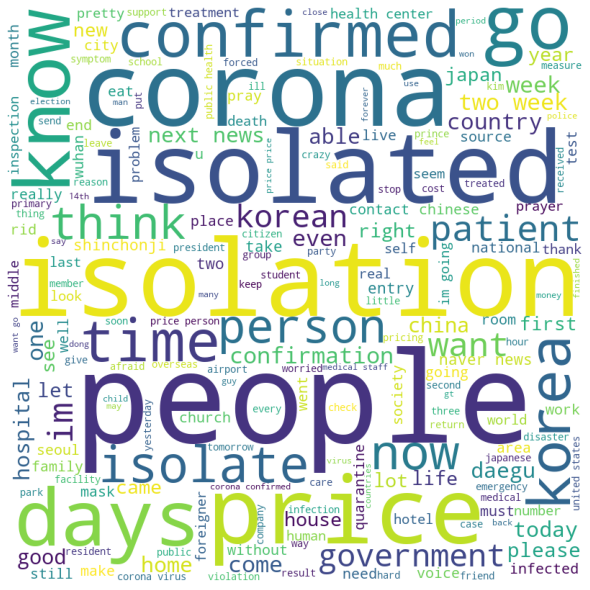

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()